<a href="https://colab.research.google.com/github/s375301/youtube-suanlab/blob/main/101_seaborn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
sns.__version__

'0.11.2'

## 산점도 (Scatter plot)

In [5]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### relplot

- relplot: ggplot2::qplot과 비슷, 여러 플롯의 상위 플롯이다.
- 아무런 조건 없이 사용 시, scatterplot 형태를 이용한다.
- arg
  - x, y
  - hue
    - dtype=cat
    - dtype=float/int: Gradient
  - col
  - style
  - size

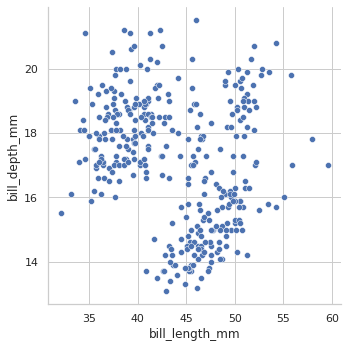

In [9]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins);

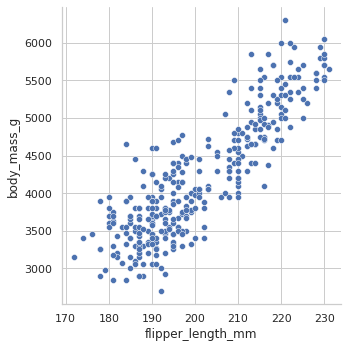

In [10]:
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=penguins); # 양의 상관관계

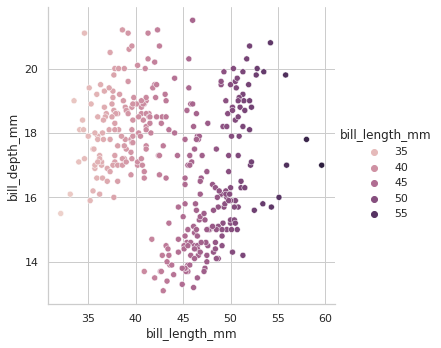

In [12]:
# hue: ggplot2::scale_color_manual
sns.relplot(x="bill_length_mm", y="bill_depth_mm",
           hue="bill_length_mm",
           data=penguins);

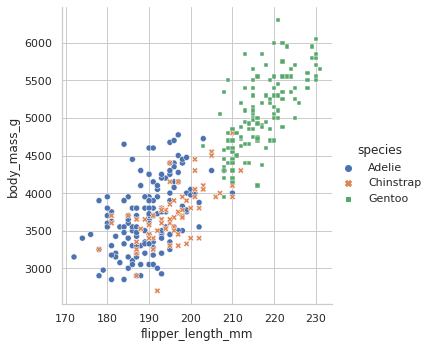

In [18]:
# marker styl & color by col"species"
sns.relplot(x="flipper_length_mm", y="body_mass_g",
           hue="species", style="species",
           data=penguins);

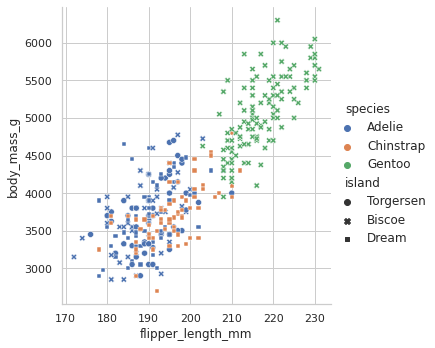

In [19]:
sns.relplot(x="flipper_length_mm", y="body_mass_g",
           hue="species", style="island",
           data=penguins);

In [21]:
# hue & style arg => for categorical dtype
# hue & style arg 들이 서로 다른 범주형 데이터를 가르키는 경우, readability가 떨어진다.
# 하나는 col arg 를 통해 물리적으로 분리한다.

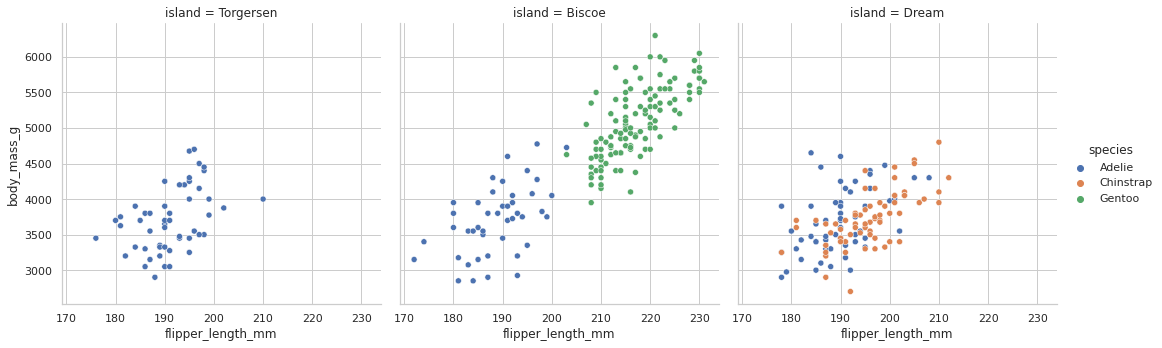

In [22]:
sns.relplot(x="flipper_length_mm", y="body_mass_g",
           hue="species", col="island",
           data=penguins);

In [25]:
# island 별로 서식하는 펭귄종이 다르구나.
# Dream Island의 두 종의 펭귄은 유사한 특징을 띄는구나. (== flipper length와 body mass로 두 종을 분류할 수 없구나.)

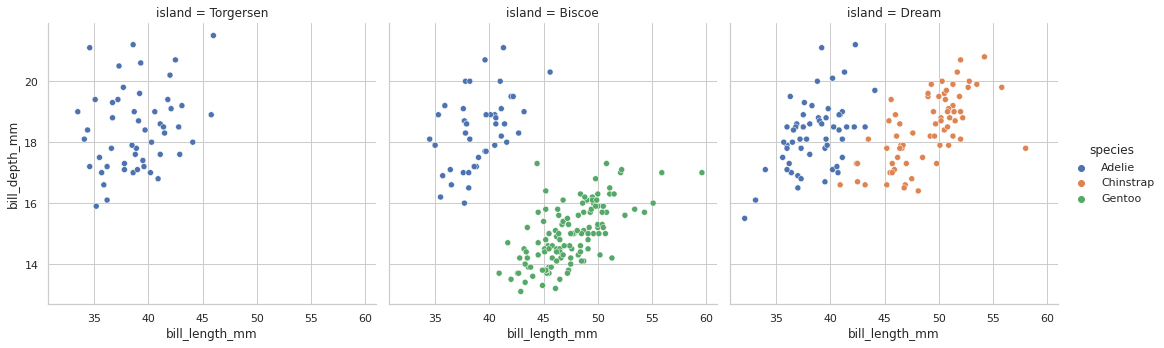

In [24]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm",
           hue="species", col="island",
           data=penguins);

In [26]:
# 반면 Dream Island에 서식하는 두 펭귄종은 bill length로 분류가 가능하겠다. (유추)

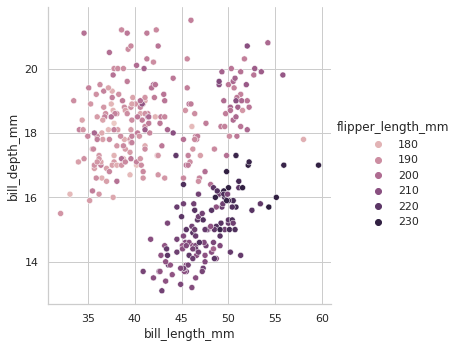

In [27]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm",
           hue="flipper_length_mm",
           data=penguins);

In [28]:
# hue arg에 수치형 데이터가 들어가면 그라디언트가 들어간다.

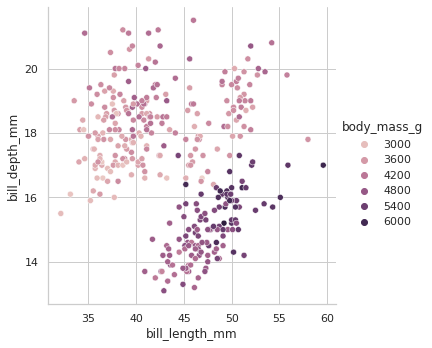

In [29]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm",
           hue="body_mass_g",
           data=penguins);

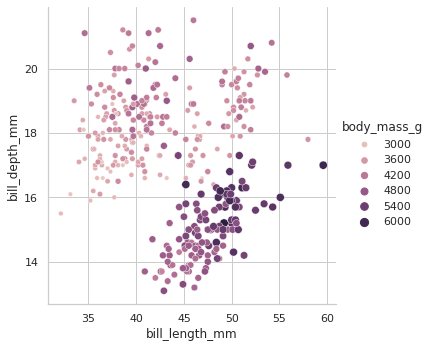

In [31]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm",
           hue="body_mass_g", size="body_mass_g",
           data=penguins);

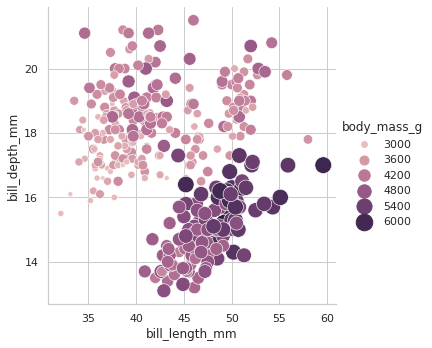

In [33]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm",
           hue="body_mass_g", size="body_mass_g",
           sizes=(10, 300),
           data=penguins);

## 라인플롯 (Line Plot)

- ci
- estimator
- hue
- style
- dashes
- markers

In [34]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


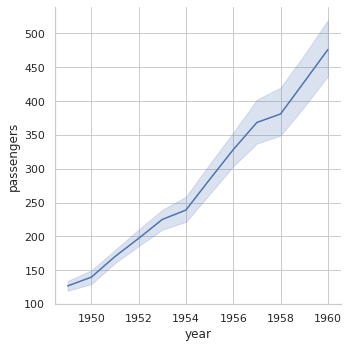

In [35]:
sns.relplot(x="year", y="passengers",
            kind="line", data=flights);

In [38]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


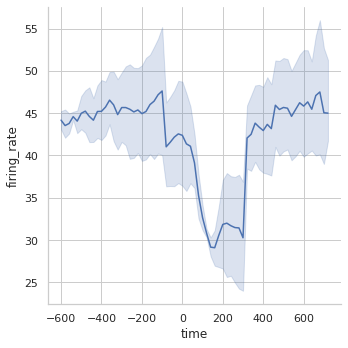

In [39]:
sns.relplot(x="time", y="firing_rate",
            kind="line", data=dots);

In [40]:
# area plot: 95% 신뢰구간

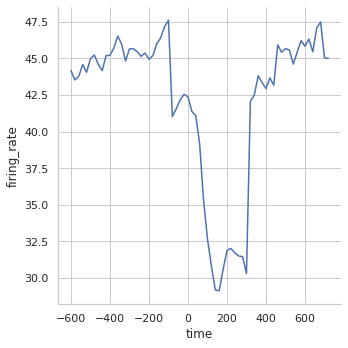

In [41]:
sns.relplot(x="time", y="firing_rate",
            kind="line", ci=None,
            data=dots);

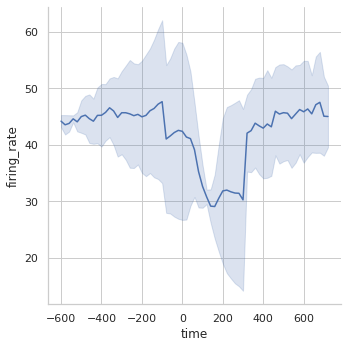

In [42]:
sns.relplot(x="time", y="firing_rate",
            kind="line", ci="sd", # sd: 표준편차로 신뢰구간 대신에 활용하는 경우
            data=dots);

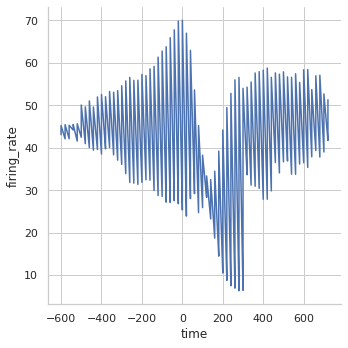

In [43]:
sns.relplot(x="time", y="firing_rate",
            kind="line", estimator=None, # estimator=None: 집계를 안하고 모든 데이터를 표현해줘 
            data=dots);

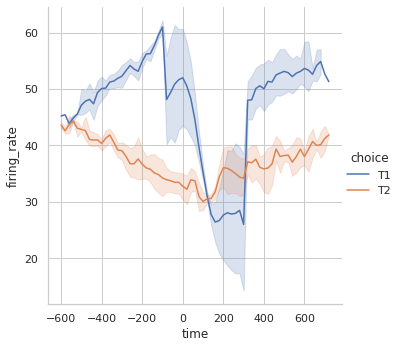

In [44]:
sns.relplot(x="time", y="firing_rate",
            kind="line", hue="choice",
            data=dots);

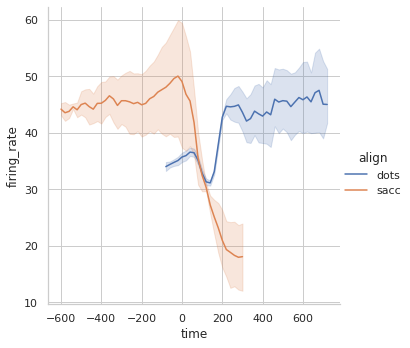

In [45]:
sns.relplot(x="time", y="firing_rate",
            kind="line", hue="align",
            data=dots);

In [46]:
# align은 구분된 형태, time과 어느정도 관련되어 있음을 유추한다.

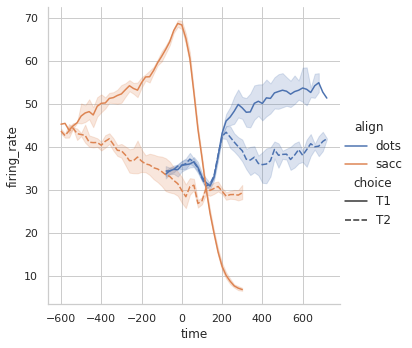

In [48]:
sns.relplot(x="time", y="firing_rate",
            hue="align", style="choice",
            kind="line", data=dots);

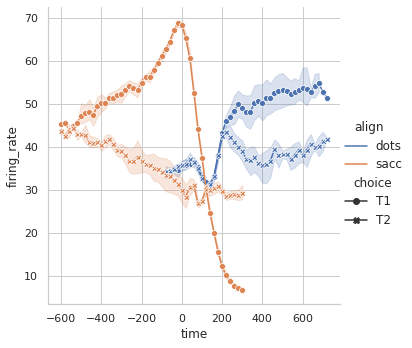

In [51]:
sns.relplot(x="time", y="firing_rate",
            hue="align", style="choice",
            dashes=False, markers=True,
            kind="line", data=dots);

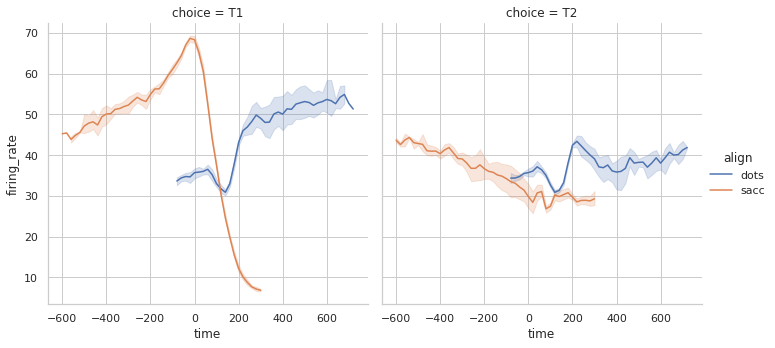

In [52]:
sns.relplot(x="time", y="firing_rate",
            hue="align", col="choice",
            kind="line", data=dots);

In [54]:
# 특정 조건에 해당하는 데이터만 사용하고 싶은경우, query 메서드 함수를 사용한다.

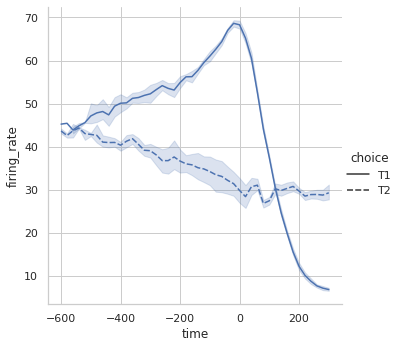

In [53]:
sns.relplot(x="time", y="firing_rate",
            style="choice",
            kind="line", data=dots.query("align=='sacc'"));

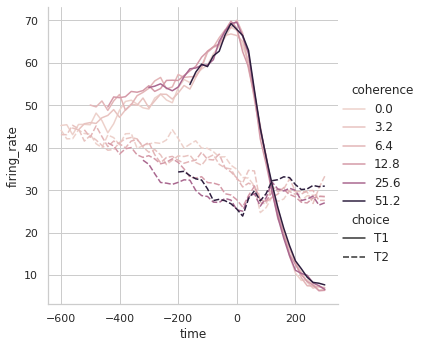

In [55]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots.query("align=='sacc'"));

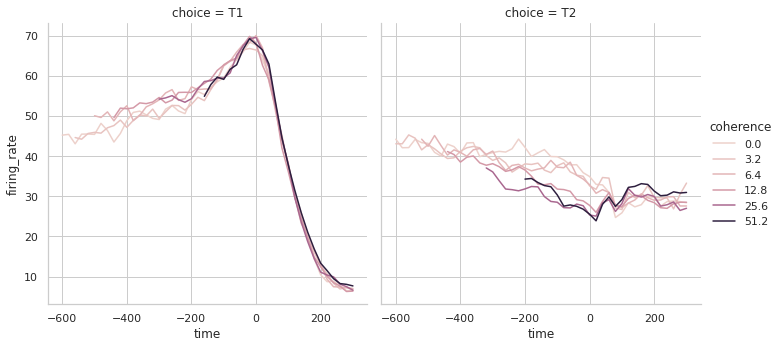

In [56]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", col="choice",
            kind="line", data=dots.query("align=='sacc'"));

In [57]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


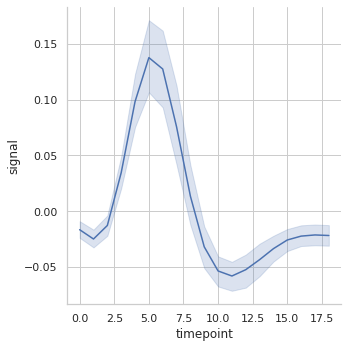

In [59]:
sns.relplot(x="timepoint", y="signal",
            kind="line", data=fmri);

In [60]:
# sns.relplot은 x축(timepoint)을 자동정렬하여 사용한다.

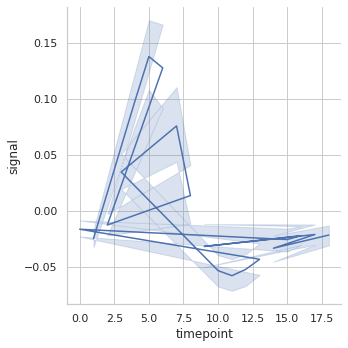

In [61]:
sns.relplot(x="timepoint", y="signal",
            sort=False,
            kind="line", data=fmri);

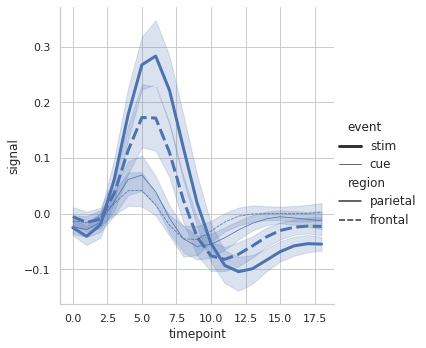

In [62]:
sns.relplot(x="timepoint", y="signal",
            style="region", size="event",
            kind="line", data=fmri);

In [63]:
# style과 size를 다른 피쳐를 사용한 경우, 보기 불편하다.

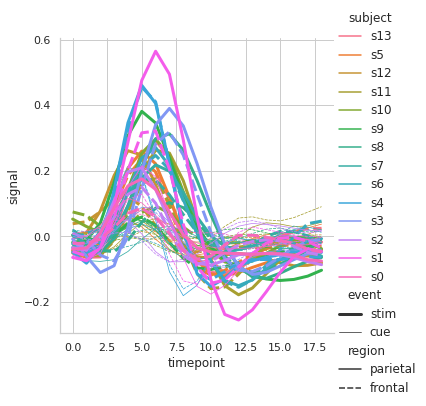

In [64]:
sns.relplot(x="timepoint", y="signal",
            hue="subject", style="region", size="event",
            kind="line", data=fmri);

In [65]:
# 모든 데이터를 플롯에 등장시키는 건 인사이트 도출에 도움이 되지 않는다.

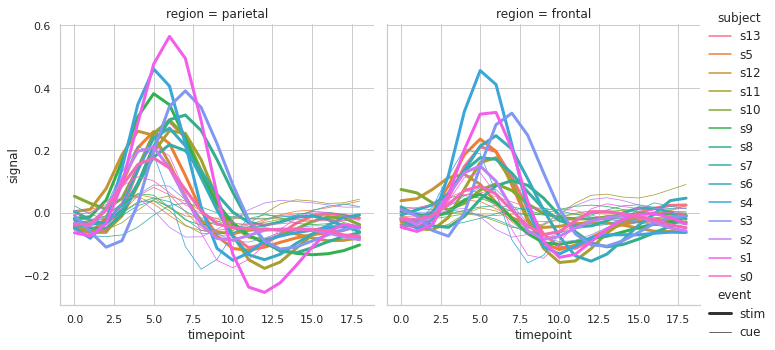

In [67]:
# 개선(1): col 인자 사용하기

sns.relplot(x="timepoint", y="signal",
            hue="subject", col="region", size="event",
            kind="line", data=fmri);

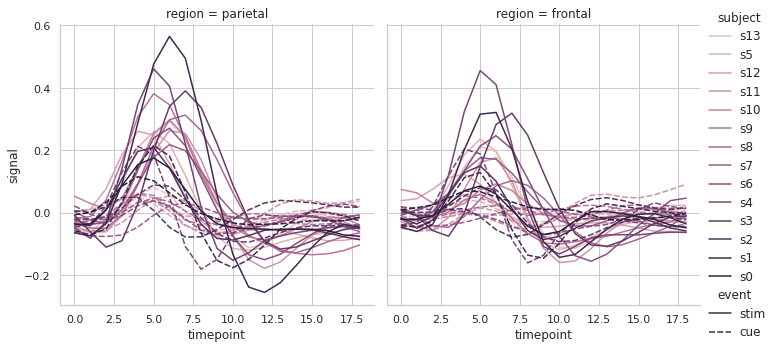

In [70]:
# 개선(2): palette 기능 이용하기

palette = sns.cubehelix_palette(n_colors=14, light=0.8)
sns.relplot(x="timepoint", y="signal",
            hue="subject", col="region", style="event",
            palette= palette, kind="line",
            data=fmri);

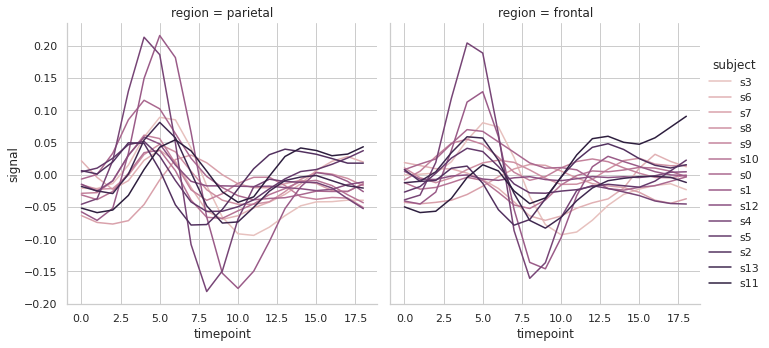

In [72]:
# 개선(3): query 특정 데이터만 추출하기

palette = sns.cubehelix_palette(n_colors=14, light=0.8)
sns.relplot(x="timepoint", y="signal",
            hue="subject", col="region",
            palette= palette, kind="line",
            data=fmri.query("event=='cue'"));

In [73]:
# event 피쳐가 cue 인 것 만 추출하므로, 불필요한 style="event" 인자를 제거한다.

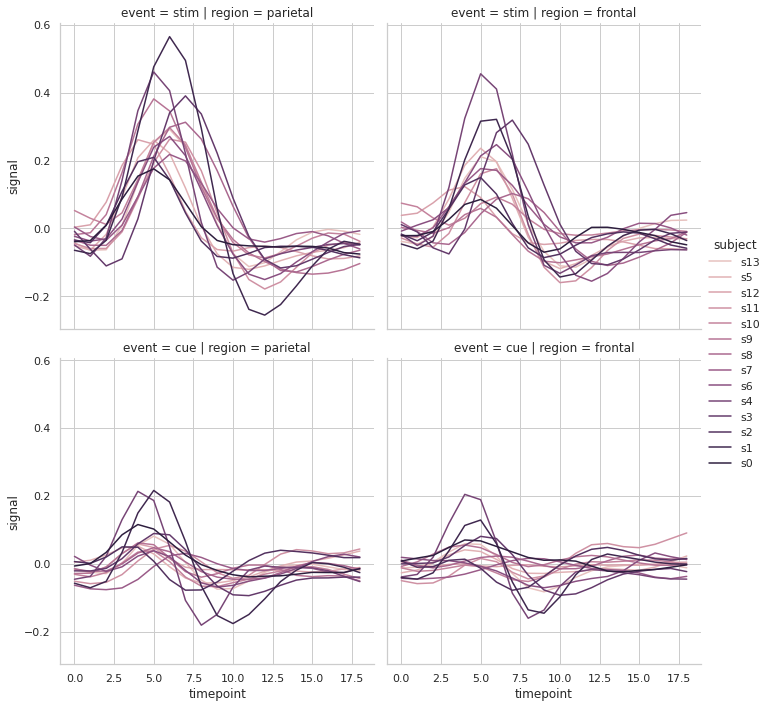

In [75]:
# 개선(4): row 인자를 활용하여 세분화

palette = sns.cubehelix_palette(n_colors=14, light=0.8)
sns.relplot(x="timepoint", y="signal", row="event",
            hue="subject", col="region",
            palette= palette, kind="line",
            data=fmri);

In [76]:
# 모든 정보를 나타낼 수 있다.

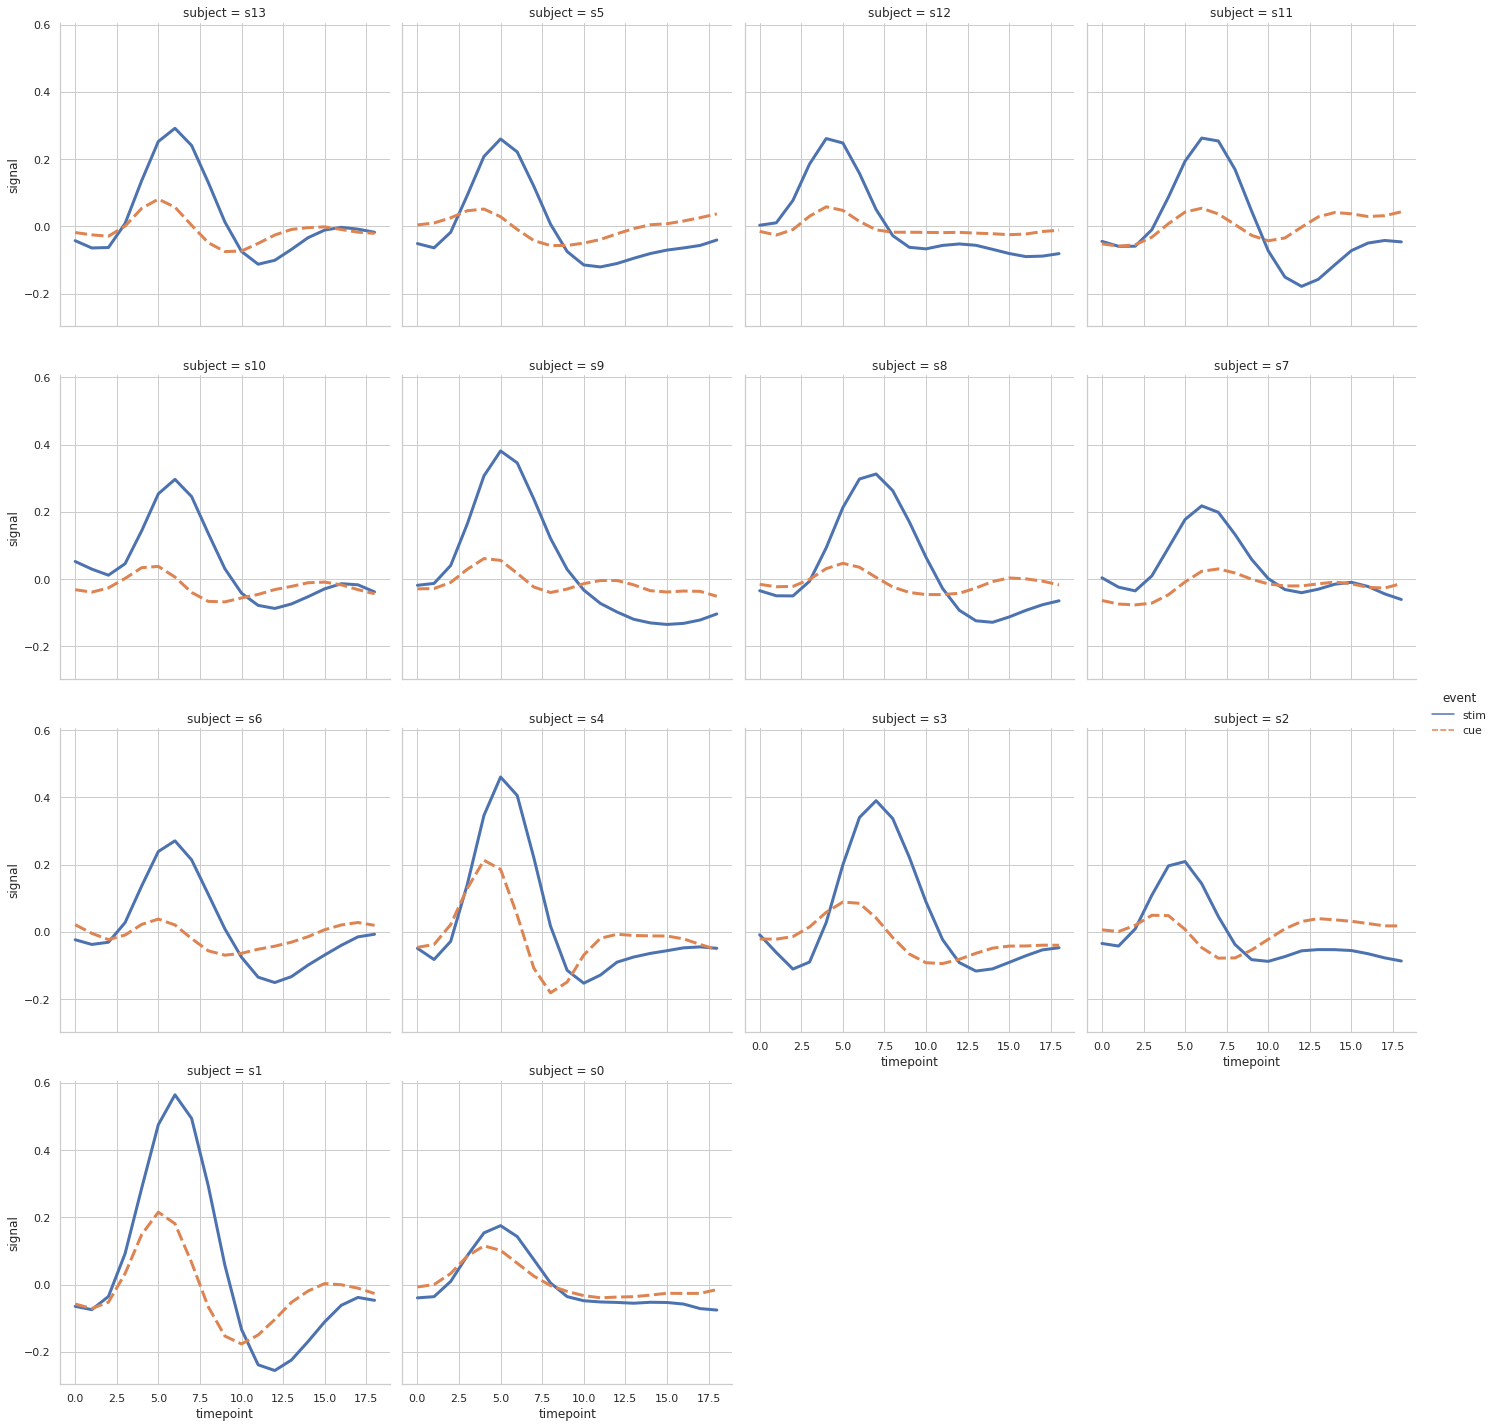

In [78]:
# 개선(5): 범주가 많은 피쳐와 적은 피쳐를 각각 col, style로 변경하여 좀 더 세분화하여 보면 인사이트 도출이 더 쉽다

sns.relplot(x="timepoint", y="signal",
            hue="event", style="event",
            col="subject", col_wrap=4, linewidth=3, # 4 columns
            kind="line",
            data=fmri.query("region=='parietal'"));

In [82]:
tdf = pd.DataFrame(np.random.randn(40, 4),
                   index=pd.date_range('2020-01-01', periods=40),
                   columns=['A', 'B', 'C', 'D'])
tdf.head()

,A,B,C,D
2020-01-01,-0.139726,-0.051547,1.246806,-0.332962
2020-01-02,0.152937,1.151053,0.620924,-1.348354
2020-01-03,0.176878,0.170486,0.667693,-0.611796
2020-01-04,0.695582,1.094933,0.600584,1.017507
2020-01-05,-1.085018,0.134954,0.858194,-0.685103


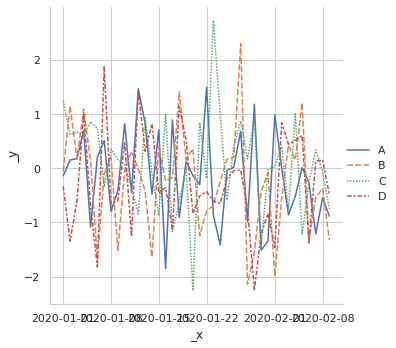

In [84]:
sns.relplot(kind="line", data=tdf);

In [85]:
# x축인 date_time이 겹치게 되어 가독성이 떨어진다.

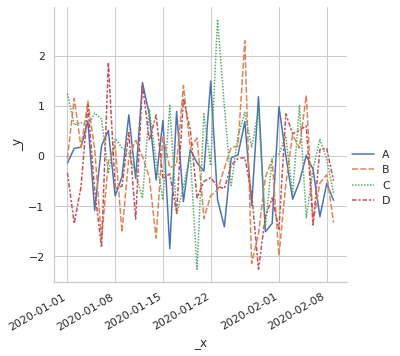

In [86]:
# 해결: 변수에 받고, auto fomrat 메서드 함수를 사용한다.

g = sns.relplot(kind="line", data=tdf);
g.fig.autofmt_xdate()

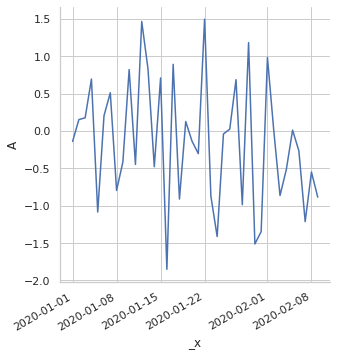

In [87]:
g = sns.relplot(kind="line", data=tdf['A']);
g.fig.autofmt_xdate()